In [11]:
from src.dlc_practical_prologue import generate_pair_sets
from src.utils import load_class_data, load_target_data, load_all_data, print_param_count
from src.models import *
from src.trainer import Trainer
import matplotlib.pyplot as plt

In [12]:
dl_train_all, dl_val_all, dl_test_all = load_all_data(normalize=True)

In [13]:
# Train siamese network without aux loss and return digits only 

# Can use any network with ten output nodes here
le_net = LeNet()

nb_epochs = 25
n_cv = 10
train_accuracies = []
train_losses = []
validation_accuracies = []
test_accuracies = []

In [14]:
for i in range(n_cv):
    print('cv iter', i)
    siamese_le_net = Siamese(le_net, target=None, weight_aux=0.)
    trainer = Trainer(nb_epochs=nb_epochs)

    loss_train, acc_train, acc_val = trainer.fit(siamese_le_net, dl_train_all, dl_val_all, verbose=True)
    train_losses.append(loss_train)
    train_accuracies.append(acc_train)
    validation_accuracies.append(acc_val)
    acc_test = trainer.test(siamese_le_net, dl_test_all, test_verbose=True, return_acc=True)
    
    test_accuracies.append(acc_test)

cv iter 0
# Epoch 1/25:	 loss=1.93	 loss_val=1.31	 acc_val=76.34
# Epoch 2/25:	 loss=0.83	 loss_val=0.58	 acc_val=89.29
# Epoch 3/25:	 loss=0.46	 loss_val=0.42	 acc_val=88.39
# Epoch 4/25:	 loss=0.31	 loss_val=0.35	 acc_val=89.29
# Epoch 5/25:	 loss=0.22	 loss_val=0.32	 acc_val=90.62
# Epoch 6/25:	 loss=0.2	 loss_val=0.3	 acc_val=91.52
# Epoch 7/25:	 loss=0.16	 loss_val=0.28	 acc_val=92.41
# Epoch 8/25:	 loss=0.14	 loss_val=0.28	 acc_val=90.62
# Epoch 9/25:	 loss=0.1	 loss_val=0.28	 acc_val=92.86
# Epoch 10/25:	 loss=0.08	 loss_val=0.28	 acc_val=91.52
# Epoch 11/25:	 loss=0.06	 loss_val=0.26	 acc_val=92.41
# Epoch 12/25:	 loss=0.05	 loss_val=0.28	 acc_val=93.3
# Epoch 13/25:	 loss=0.05	 loss_val=0.29	 acc_val=92.86
# Epoch 14/25:	 loss=0.04	 loss_val=0.26	 acc_val=94.2
# Epoch 15/25:	 loss=0.03	 loss_val=0.25	 acc_val=93.75
# Epoch 16/25:	 loss=0.02	 loss_val=0.22	 acc_val=94.64
# Epoch 17/25:	 loss=0.02	 loss_val=0.24	 acc_val=93.75
# Epoch 18/25:	 loss=0.02	 loss_val=0.3	 acc_val=93.

# Epoch 22/25:	 loss=0.0	 loss_val=0.46	 acc_val=95.54
# Epoch 23/25:	 loss=0.0	 loss_val=0.46	 acc_val=95.54
# Epoch 24/25:	 loss=0.0	 loss_val=0.46	 acc_val=95.54
# Epoch 25/25:	 loss=0.0	 loss_val=0.46	 acc_val=95.54
loss_test=0.18	 acc_test=98.05
cv iter 6
# Epoch 1/25:	 loss=0.0	 loss_val=0.39	 acc_val=94.2
# Epoch 2/25:	 loss=0.0	 loss_val=0.47	 acc_val=95.09
# Epoch 3/25:	 loss=0.0	 loss_val=0.53	 acc_val=94.64
# Epoch 4/25:	 loss=0.01	 loss_val=0.4	 acc_val=95.54
# Epoch 5/25:	 loss=0.01	 loss_val=0.43	 acc_val=95.09
# Epoch 6/25:	 loss=0.0	 loss_val=0.54	 acc_val=95.54
# Epoch 7/25:	 loss=0.0	 loss_val=0.52	 acc_val=95.54
# Epoch 8/25:	 loss=0.0	 loss_val=0.56	 acc_val=95.54
# Epoch 9/25:	 loss=0.0	 loss_val=0.54	 acc_val=95.54
# Epoch 10/25:	 loss=0.0	 loss_val=0.54	 acc_val=95.54
# Epoch 11/25:	 loss=0.0	 loss_val=0.53	 acc_val=95.54
# Epoch 12/25:	 loss=0.0	 loss_val=0.53	 acc_val=95.54
# Epoch 13/25:	 loss=0.0	 loss_val=0.53	 acc_val=95.54
# Epoch 14/25:	 loss=0.0	 loss_va

In [15]:
import numpy as np 
avg_test_acc = np.mean(test_accuracies)
print('avg test acc', avg_test_acc)
stdev_test_acc = np.std(test_accuracies)
print('stdev', stdev_test_acc)

avg test acc 97.501
stdev 0.30061437091396603


In [16]:
train_losses = np.mean(np.array(train_losses), axis=0)
train_accuracies = np.mean(np.array(train_accuracies), axis=0)
validation_accuracies = np.mean(np.array(validation_accuracies), axis=0)

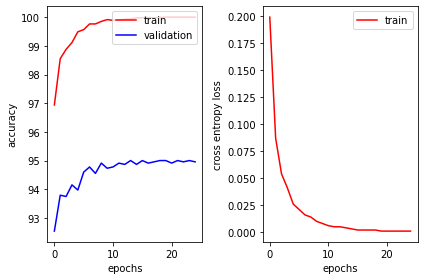

In [17]:
from src.utils import plot_training_epochs
plt = plot_training_epochs(nb_epochs, train_losses, train_accuracies, 
                          validation_accuracies)